In [7]:
from owlready2 import *

# Create ontology
onto = get_ontology("http://example.org/urlreputation.owl")

with onto:
    # Define Classes
    class URL(Thing): pass
    class SSLStatus(Thing): pass
    class URLStructure(Thing): pass
    class RiskLevel(Thing): pass

    # Object Properties
    class hasSSLStatus(ObjectProperty):
        domain = [URL]
        range = [SSLStatus]

    class hasStructure(ObjectProperty):
        domain = [URL]
        range = [URLStructure]

    class hasRiskLevel(ObjectProperty):
        domain = [URL]
        range = [RiskLevel]

    # ✅ Functional Data Properties
    class hasLength(DataProperty, FunctionalProperty):
        domain = [URL]
        range = [int]

    class hasPhishingScore(DataProperty, FunctionalProperty):
        domain = [URL]
        range = [float]

    # Instances of concepts
    ssl_yes = SSLStatus("SSL")
    ssl_no = SSLStatus("NoSSL")

    struct_ip = URLStructure("IPBased")
    struct_domain = URLStructure("DomainBased")

    risk_high = RiskLevel("High")
    risk_low = RiskLevel("Low")

    # Example Safe URL
    url1 = URL("url_google")
    url1.hasSSLStatus = [ssl_yes]
    url1.hasStructure = [struct_domain]
    url1.hasLength = 20
    url1.hasPhishingScore = 0.1
    url1.hasRiskLevel = [risk_low]

    # Example Phishing URL
    url2 = URL("url_phishy")
    url2.hasSSLStatus = [ssl_no]
    url2.hasStructure = [struct_ip]
    url2.hasLength = 120
    url2.hasPhishingScore = 0.95
    url2.hasRiskLevel = [risk_high]

# Save to file
onto.save(file="url_reputation.owl", format="rdfxml")
print("✅ Ontology saved as url_reputation.owl")


✅ Ontology saved as url_reputation.owl


In [8]:
from owlready2 import get_ontology

onto = get_ontology("url_reputation.owl").load()

# Print all URL instances and their risk level
for url in onto.URL.instances():
    print(f"🔗 {url.name} ➜ Risk: {url.hasRiskLevel[0].name}")


🔗 url_google ➜ Risk: Low
🔗 url_phishy ➜ Risk: High


In [11]:
from owlready2 import *

onto = get_ontology("url_reputation.owl").load()

with onto:
    class URL(Thing): pass
    class SSLStatus(Thing): pass
    class Structure(Thing): pass
    class RiskLevel(Thing): pass

    class hasSSLStatus(URL >> SSLStatus): pass
    class hasStructure(URL >> Structure): pass
    class hasRiskLevel(URL >> RiskLevel): pass
    class hasLength(URL >> int, DataProperty): pass
    class hasPhishingScore(URL >> float, DataProperty): pass

    # Create only if not already present
    if not onto.search_one(iri="*ssl_no"): SSLStatus("ssl_no")
    if not onto.search_one(iri="*ssl_yes"): SSLStatus("ssl_yes")
    if not onto.search_one(iri="*struct_ip"): Structure("struct_ip")
    if not onto.search_one(iri="*struct_domain"): Structure("struct_domain")
    if not onto.search_one(iri="*risk_low"): RiskLevel("risk_low")
    if not onto.search_one(iri="*risk_high"): RiskLevel("risk_high")

onto.save("url_reputation.owl")
print("✅ All base instances ensured.")


✅ All base instances ensured.


In [13]:
from owlready2 import *

onto = get_ontology("url_reputation.owl").load()

# Safely get instances
ssl_no = onto.search_one(iri="*ssl_no")
struct_ip = onto.search_one(iri="*struct_ip")
risk_high = onto.search_one(iri="*risk_high")

if not all([ssl_no, struct_ip, risk_high]):
    print("❌ One or more base instances not found.")
else:
    with onto:
        new_url = onto.URL("example_com")
        new_url.hasSSLStatus.append(ssl_no)
        new_url.hasStructure.append(struct_ip)
        new_url.hasLength = 100
        new_url.hasPhishingScore = 0.95
        new_url.hasRiskLevel.append(risk_high)

    onto.save("url_reputation.owl")
    print("✅ New URL added successfully!")


✅ New URL added successfully!


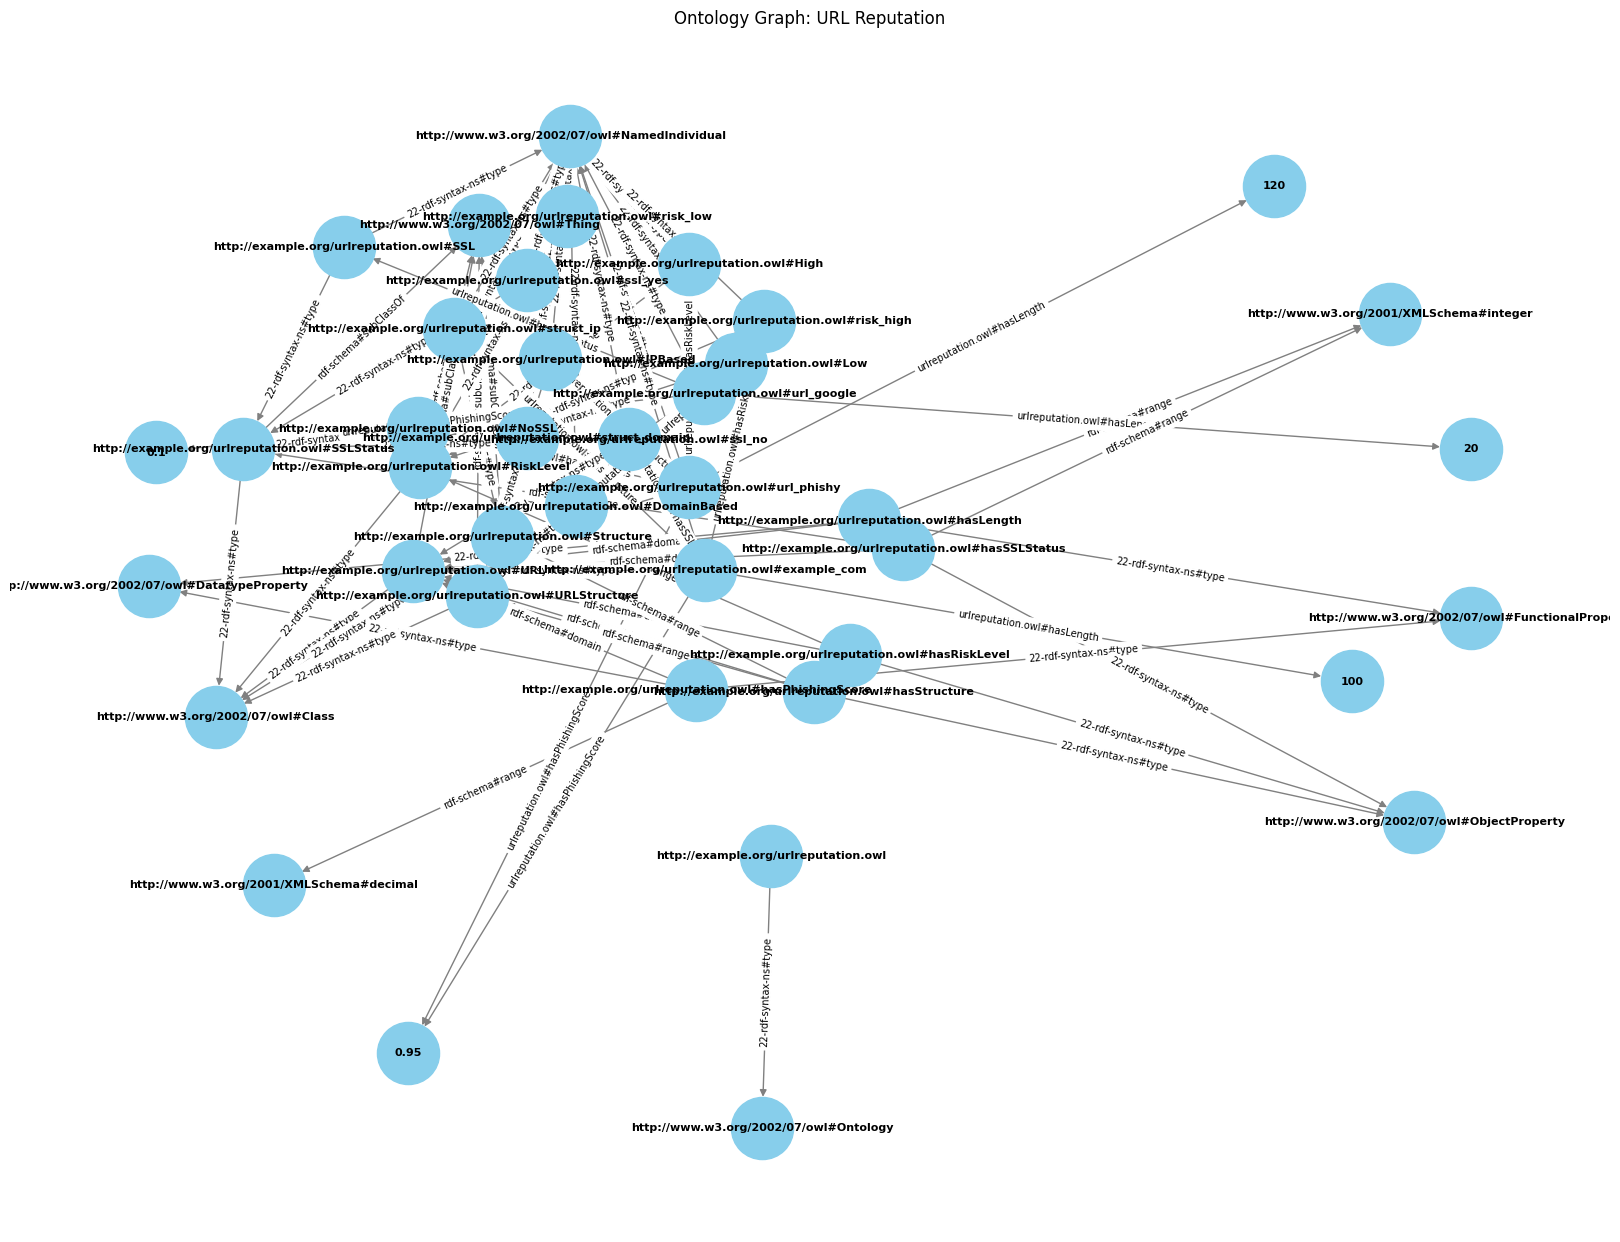

In [14]:
from rdflib import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Load the OWL file
g = Graph()
g.parse("url_reputation.owl", format="xml")  # RDF/XML format

# Create a directed graph
G = nx.DiGraph()

# Add triples as edges to the graph
for subj, pred, obj in g:
    G.add_edge(str(subj), str(obj), label=str(pred.split('/')[-1]))

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.5)  # Graph layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=8, font_weight='bold', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Ontology Graph: URL Reputation")
plt.axis('off')
plt.show()
